In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [2]:
CSV = "/media/marsdenlab/Data1/UQ/0110/csv/\
wom_rcr_1/aorta_single_tube.csv"

df = pd.read_csv(CSV)
print(df.columns)

Index(['Unnamed: 0', 'area', 'generation', 'length', 'mesh', 'model', 'nx',
       'ny', 'nz', 'point', 'pressure_0', 'pressure_0_boundary',
       'radius_actual', 'radius_supplied', 'time', 'vWSS_0', 'vWSS_0_boundary',
       'vWSS_1', 'vWSS_1_boundary', 'vWSS_2', 'vWSS_2_boundary', 'vWSS_3',
       'vWSS_3_boundary', 'velocity_0', 'velocity_0_boundary', 'velocity_1',
       'velocity_1_boundary', 'velocity_2', 'velocity_2_boundary',
       'velocity_3', 'velocity_3_boundary', 'x', 'y', 'z'],
      dtype='object')


In [3]:
quant    = "pressure_0"
label    = quant.split('_')[0]
models   = list(range(50))
mesh     = "coarse"

dt       = 0.02

In [4]:
series_x = []
series_y = []
for m in models:
    data = df.loc[(df['model'] == m) & (df['mesh']==mesh)]
    if data.shape[0] == 0: continue
    y = data[quant].values
    x = data['time'].values*dt
    
    series_x.append(x)
    series_y.append(y)
    
Y = np.array(series_y)
X = np.array(series_x)

No handles with labels found to put in legend.


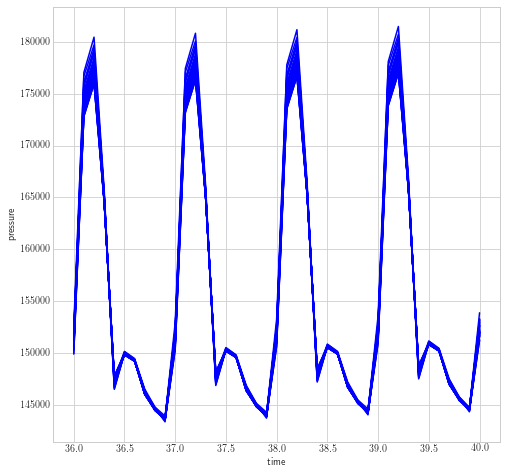

In [5]:
plt.figure(figsize=(8,8))
plt.plot(X.T,Y.T, color='b')
plt.xlabel("time")
plt.ylabel(label)
plt.legend()
plt.show()